In [1]:
import tensorflow as tf; tf.enable_eager_execution(); print(tf.reduce_sum(tf.random_normal([1000, 1000])))

tf.Tensor(-364.11725, shape=(), dtype=float32)


In [1]:
from shapely.geometry import Point, LineString, Polygon

In [2]:
point_1 = Point(2.2, 4.2)
point_2 = Point(7.2, -25.1)
point_3 = Point(9.26, -2.456)
point_3D = Point(9.26, -2.456, 0.57)

In [3]:
point_type = type(point_1)

In [4]:
print(point_1)
print(point_3D)
print(point_type)

POINT (2.2 4.2)
POINT Z (9.26 -2.456 0.57)
<class 'shapely.geometry.point.Point'>


In [9]:
point_coords = point_1.coords
type(point_coords)

shapely.coords.CoordinateSequence

In [11]:
xy = point_coords.xy
x = point_1.x
y = point_1.y

In [12]:
print(xy)
print(x)
print(y)

(array('d', [2.2]), array('d', [4.2]))
2.2
4.2


In [14]:
point_dist = point_1.distance(point_2)

In [15]:
print("Distance between the points is {0:.2f} decimal degrees".format(point_dist))

Distance between the points is 29.72 decimal degrees


In [16]:
line = LineString([point_1, point_2, point_3])

In [17]:
line2 = LineString([(2.2, 4.2), (7.2, -25.1), (9.26, -2.456)])

In [18]:
print(line)

LINESTRING (2.2 4.2, 7.2 -25.1, 9.26 -2.456)


In [19]:
print(line2)

LINESTRING (2.2 4.2, 7.2 -25.1, 9.26 -2.456)


In [20]:
type(line)

shapely.geometry.linestring.LineString

In [21]:
lxy = line.xy

In [22]:
print(lxy)

(array('d', [2.2, 7.2, 9.26]), array('d', [4.2, -25.1, -2.456]))


In [23]:
type(lxy)

tuple

In [24]:
line_x = lxy[0]
line_y = line.xy[1]

In [25]:
print(line_x)
print(line_y)

array('d', [2.2, 7.2, 9.26])
array('d', [4.2, -25.1, -2.456])


In [4]:
import geopandas as gpd

In [14]:
fp = "http://localhost:8888/edit/Downloads/Data/DAMSELFISH_distributions.shp"

In [15]:
data = gpd.read_file(fp)

DriverError: '/vsimem/8cd6169a23e943749fc0bfda775b7231' not recognized as a supported file format.

In [16]:
!pwd

/Users/shawnguiter/Documents


In [5]:
fp = "/Users/shawnguiter/Downloads/Data/DAMSELFISH_distributions.shp"

In [6]:
data = gpd.read_file(fp)

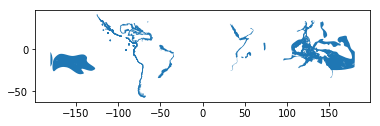

In [10]:
data.plot()

In [8]:
import matplotlib.pyplot as plt

In [11]:
plt.show()

In [12]:
data['geometry'].head()

0    POLYGON ((-115.6437454219999 29.71392059300007...
1    POLYGON ((-105.589950704 21.89339825500002, -1...
2    POLYGON ((-111.159618439 19.01535626700007, -1...
3    POLYGON ((-80.86500229899997 -0.77894492099994...
4    POLYGON ((-67.33922225599997 -55.6761029239999...
Name: geometry, dtype: object

In [13]:
selection = data[0:5]

In [14]:
for index, row in selection.iterrows():
    poly_area = row['geometry'].area
    print("Polygon area at index {0} is: {1:.3f}".format(index, poly_area))

Polygon area at index 0 is: 19.396
Polygon area at index 1 is: 6.146
Polygon area at index 2 is: 2.697
Polygon area at index 3 is: 87.461
Polygon area at index 4 is: 0.001


In [15]:
data['area'] = data.area

In [16]:
data['area'].head(2)

0    19.396254
1     6.145902
Name: area, dtype: float64

In [17]:
max_area = data['area'].max()

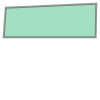

In [19]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point, Polygon
import fiona
coordinates = [(24.950899, 60.169158), (24.953492, 60.169158), (24.953510, 60.170104), (24.950958, 60.169990)]
poly = Polygon(coordinates)
poly


In [20]:
grouped = data.groupby('BINOMIAL')

In [21]:
grouped

In [22]:
grouped = data.groupby('BINOMIAL')

In [23]:
grouped

/Users/shawnguiter/venv/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


BINOMIAL
Abudefduf concolor         AxesSubplot(0.329414,0.125;0.366171x0.755)
Abudefduf declivifrons     AxesSubplot(0.154088,0.125;0.716824x0.755)
Abudefduf troschelii       AxesSubplot(0.277752,0.125;0.469497x0.755)
Amphiprion sandaracinos    AxesSubplot(0.230864,0.125;0.563272x0.755)
Azurina eupalama             AxesSubplot(0.26258,0.125;0.49984x0.755)
Azurina hirundo            AxesSubplot(0.369567,0.125;0.285866x0.755)
Chromis alpha              AxesSubplot(0.125,0.401738;0.775x0.201525)
Chromis alta                AxesSubplot(0.267285,0.125;0.49043x0.755)
Chromis atrilobata         AxesSubplot(0.268791,0.125;0.487418x0.755)
Chromis crusma             AxesSubplot(0.445788,0.125;0.133423x0.755)
Chromis cyanea             AxesSubplot(0.125,0.161336;0.775x0.682327)
Chromis flavicauda          AxesSubplot(0.39386,0.125;0.237281x0.755)
Chromis intercrusma        AxesSubplot(0.445989,0.125;0.133022x0.755)
Chromis limbaughi          AxesSubplot(0.327526,0.125;0.369947x0.755)
Chromis pem

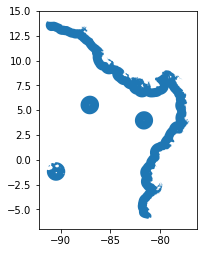

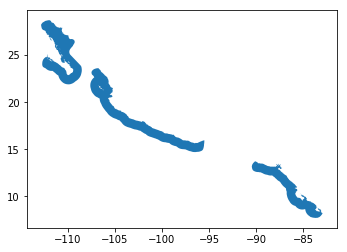

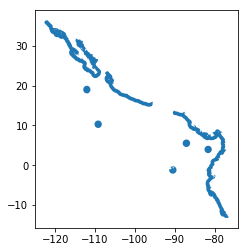

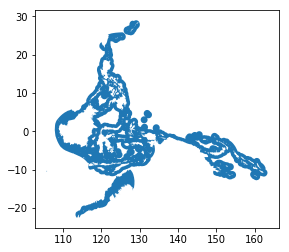

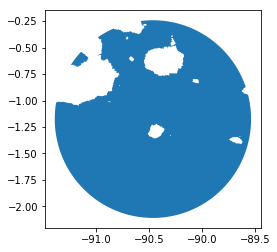

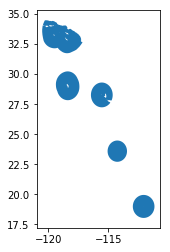

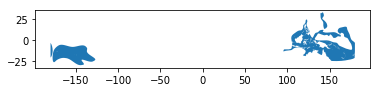

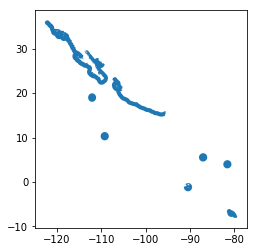

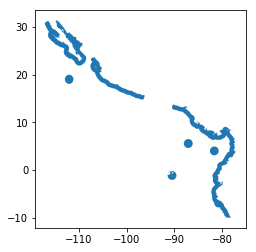

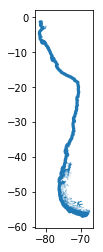

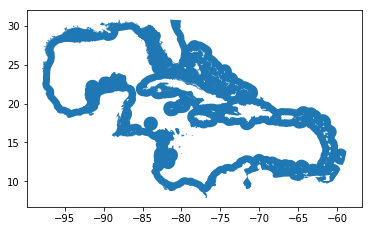

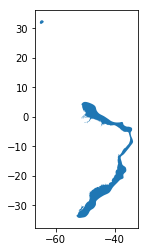

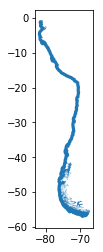

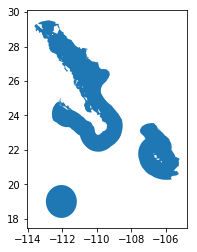

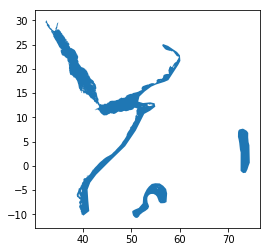

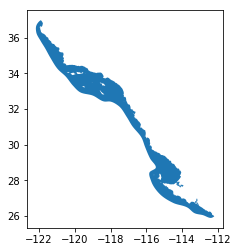

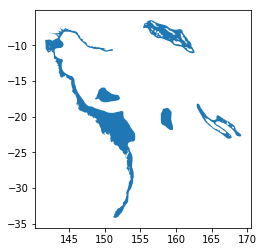

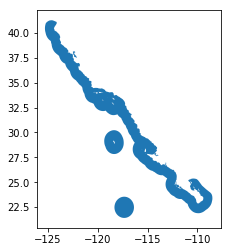

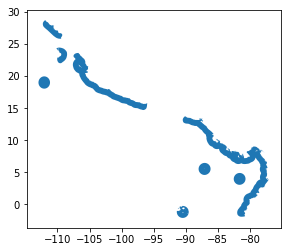

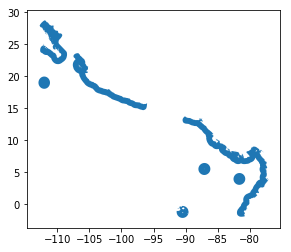

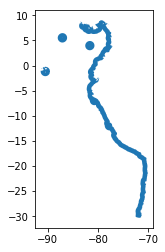

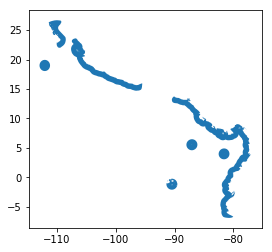

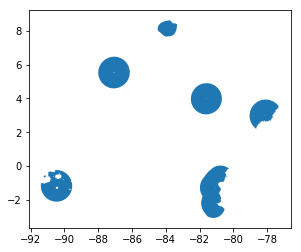

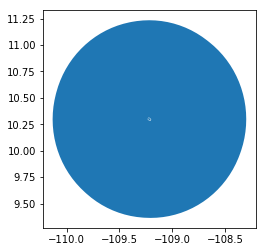

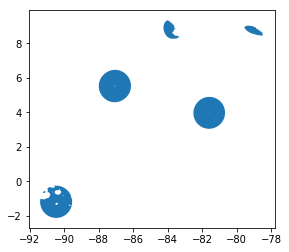

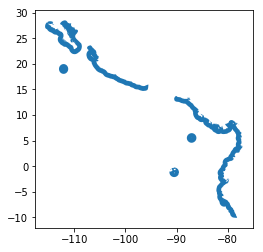

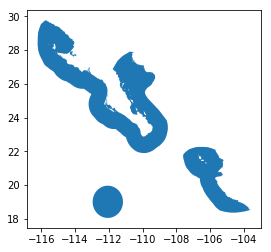

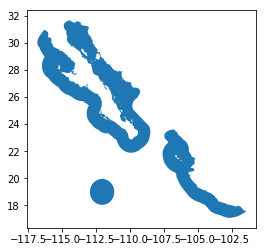

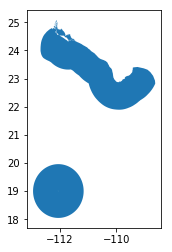

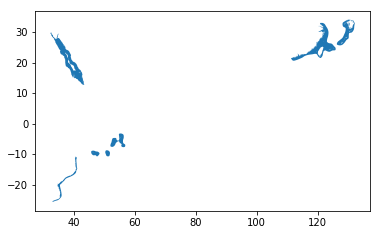

In [24]:
grouped.plot()

In [25]:
for key, values in grouped:
    individual_fish = values

In [26]:
individual_fish

ID_NO                BINOMIAL  ORIGIN COMPILER  YEAR  \
27  154915.0  Teixeirichthys jordani       1     None  2012   
28  154915.0  Teixeirichthys jordani       1     None  2012   
29  154915.0  Teixeirichthys jordani       1     None  2012   
30  154915.0  Teixeirichthys jordani       1     None  2012   
31  154915.0  Teixeirichthys jordani       1     None  2012   
32  154915.0  Teixeirichthys jordani       1     None  2012   
33  154915.0  Teixeirichthys jordani       1     None  2012   

                                             CITATION SOURCE DIST_COMM ISLAND  \
27  Red List Index (Sampled Approach), Zoological ...   None      None   None   
28  Red List Index (Sampled Approach), Zoological ...   None      None   None   
29  Red List Index (Sampled Approach), Zoological ...   None      None   None   
30  Red List Index (Sampled Approach), Zoological ...   None      None   None   
31  Red List Index (Sampled Approach), Zoological ...   None      None   None   
32  Red List Index (Sampled Approach), Zoological ...   None      None   None   
33  Red List Index (Sampled Approach), Zoological ...   None      None   None   

   SUBSPECIES    ...     KINGDOM_NA PHYLUM_NAM      CLASS_NAME   ORDER_NAME  \
27       None    ...       ANIMALIA   CHORDATA  ACTINOPTERYGII  PERCIFORMES   
28       None    ...       ANIMALIA   CHORDATA  ACTINOPTERYGII  PERCIFORMES   
29       None    ...       ANIMALIA   CHORDATA  ACTINOPTERYGII  PERCIFORMES   
30       None    ...       ANIMALIA   CHORDATA  ACTINOPTERYGII  PERCIFORMES   
31       None    ...       ANIMALIA   CHORDATA  ACTINOPTERYGII  PERCIFORMES   
32       None    ...       ANIMALIA   CHORDATA  ACTINOPTERYGII  PERCIFORMES   
33       None    ...       ANIMALIA   CHORDATA  ACTINOPTERYGII  PERCIFORMES   

       FAMILY_NAM      GENUS_NAME SPECIES_NA CATEGORY  \
27  POMACENTRIDAE  Teixeirichthys    jordani       LC   
28  POMACENTRIDAE  Teixeirichthys    jordani       LC   
29  POMACENTRIDAE  Teixeirichthys    jordani       LC   
30  POMACENTRIDAE  Teixeirichthys    jordani       LC   
31  POMACENTRIDAE  Teixeirichthys    jordani       LC   
32  POMACENTRIDAE  Teixeirichthys    jordani       LC   
33  POMACENTRIDAE  Teixeirichthys    jordani       LC   

                                             geometry       area  
27  POLYGON ((121.6300326400001 33.04248618400004,...  38.671198  
28  POLYGON ((32.56219482400007 29.97488975500005,...  37.445735  
29  POLYGON ((130.9052090560001 34.02498196400006,...  16.939460  
30  POLYGON ((56.32233070000007 -3.707270205999976...  10.126967  
31  POLYGON ((40.64476131800006 -10.85502363999996...   7.760303  
32  POLYGON ((48.11258402900006 -9.335103113999935...   3.434236  
33  POLYGON ((51.75403543100003 -9.21679305899994,...   2.408620  

[7 rows x 25 columns]

In [27]:
print(key)

Teixeirichthys jordani
